# DATA CHECKING

In [2]:
URL = "https://raw.githubusercontent.com/anhquanbui/finalprojectg7/main/COVID_Parcel_Business.csv"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(URL)
df

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
...,...,...,...,...
190714,228893,2019,13,30
190715,228893,2019,38,122
190716,228893,2019,48,99
190717,228893,2019,20,61


In [5]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   FakeCustomerID  190719 non-null  int64
 1   THE_YEAR        190719 non-null  int64
 2   THE_WEEK        190719 non-null  int64
 3   VOLUME          190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB


In [6]:
# Count distinct customer
unique_ids = df["FakeCustomerID"].unique()
print("Distinct customers:", len(unique_ids))

Distinct customers: 1061


# MAKING DIMENSION TABLES

In [7]:
# Customer Summary Table
customer_summary = df.groupby('FakeCustomerID').agg(
    Total_Volume=('VOLUME', 'sum'),           
    First_Year=('THE_YEAR', 'min'), 
    Last_Year=('THE_YEAR', 'max'),
    Weeks_Active=('THE_WEEK', 'count'),
    Avg_Weekly_Volume=('VOLUME', 'mean')
).reset_index()


print(customer_summary.head())

   FakeCustomerID  Total_Volume  First_Year  Last_Year  Weeks_Active  \
0          100771          6252        2018       2021           192   
1          102180         20553        2018       2021           193   
2          102643          8164        2018       2021           188   
3          102750          2747        2018       2021           140   
4          103308        326088        2018       2021           197   

   Avg_Weekly_Volume  
0          32.562500  
1         106.492228  
2          43.425532  
3          19.621429  
4        1655.269036  


In [8]:
# Weekly Aggregation Table
weekly_agg = df.groupby(['THE_YEAR', 'THE_WEEK']).agg(
    Total_Volume=('VOLUME', 'sum'),
    Num_Customers=('FakeCustomerID', 'nunique'),
    Avg_Volume_Per_Customer=('VOLUME', 'mean')
).reset_index()

print(weekly_agg.head())


   THE_YEAR  THE_WEEK  Total_Volume  Num_Customers  Avg_Volume_Per_Customer
0      2018         1        817751            872               937.787844
1      2018         2        925839            908              1019.646476
2      2018         3        854760            915               934.163934
3      2018         4        800040            914               875.317287
4      2018         5        812249            914               888.675055


In [9]:
# Yearly Summary Table
yearly_summary = df.groupby('THE_YEAR').agg(
    Total_Volume=('VOLUME', 'sum'), 
    Unique_Customers=('FakeCustomerID', 'nunique'),
    Avg_Volume_Per_Customer=('VOLUME', 'mean')
).reset_index()

print(yearly_summary)

   THE_YEAR  Total_Volume  Unique_Customers  Avg_Volume_Per_Customer
0      2018      49099478              1025               992.871431
1      2019      52823114              1061               994.130310
2      2020      73475690              1046              1428.487635
3      2021      48679668              1014              1326.566056


In [10]:
# Customer-Year Matrix Table
customer_year_matrix = df.pivot_table(
    index='FakeCustomerID',
    columns='THE_YEAR',
    values='VOLUME',
    aggfunc='sum',
    fill_value=0
).reset_index()

print(customer_year_matrix.head())


THE_YEAR  FakeCustomerID   2018   2019    2020   2021
0                 100771   1687   1816    1789    960
1                 102180   5525   5222    4817   4989
2                 102643   1910   2670    1703   1881
3                 102750   1040   1013     405    289
4                 103308  50321  90140  103700  81927


# TABLES PLOTS

**Yearly Summary**

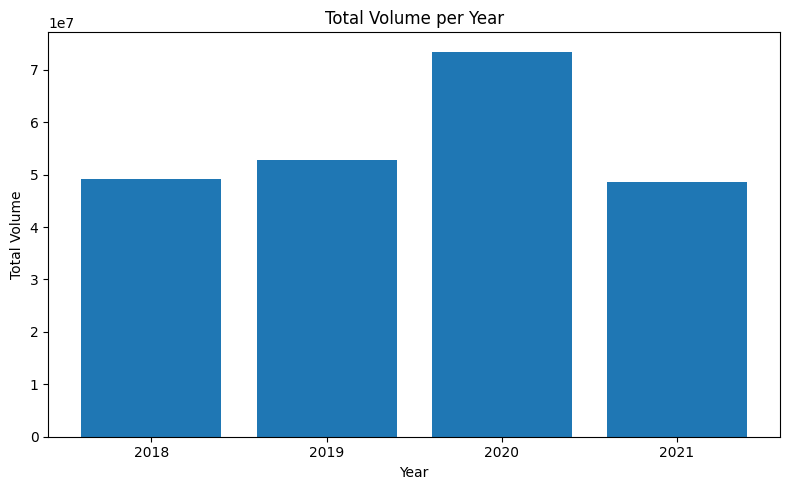

In [11]:
years = yearly_summary['THE_YEAR']
volume = yearly_summary['Total_Volume']

plt.figure(figsize=(8, 5))
plt.bar(x=years, height=volume)
plt.title('Total Volume per Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.xticks(years)
plt.tight_layout()
plt.show()

**Weekly Summary**

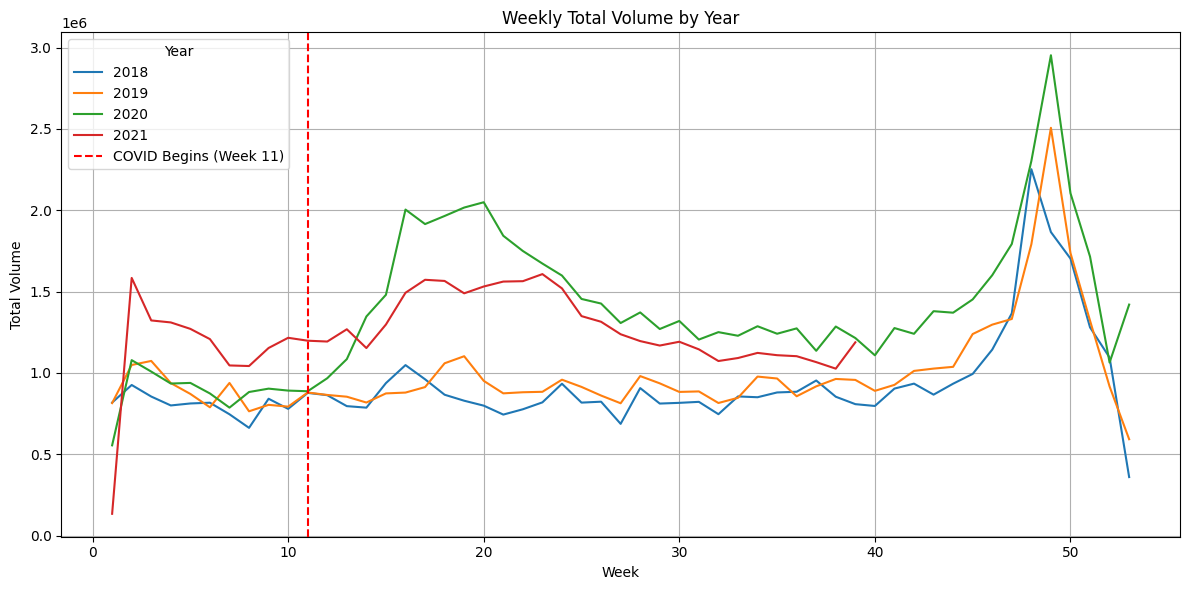

In [18]:
plt.figure(figsize=(12, 6))

for year in weekly_agg['THE_YEAR'].unique():
    data = weekly_agg[weekly_agg['THE_YEAR'] == year]
    plt.plot(data['THE_WEEK'], data['Total_Volume'], label=str(year))
plt.axvline(x=11, color='red', linestyle='--', label='COVID Begins (Week 11)')
plt.title('Weekly Total Volume by Year')
plt.xlabel('Week')
plt.ylabel('Total Volume')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

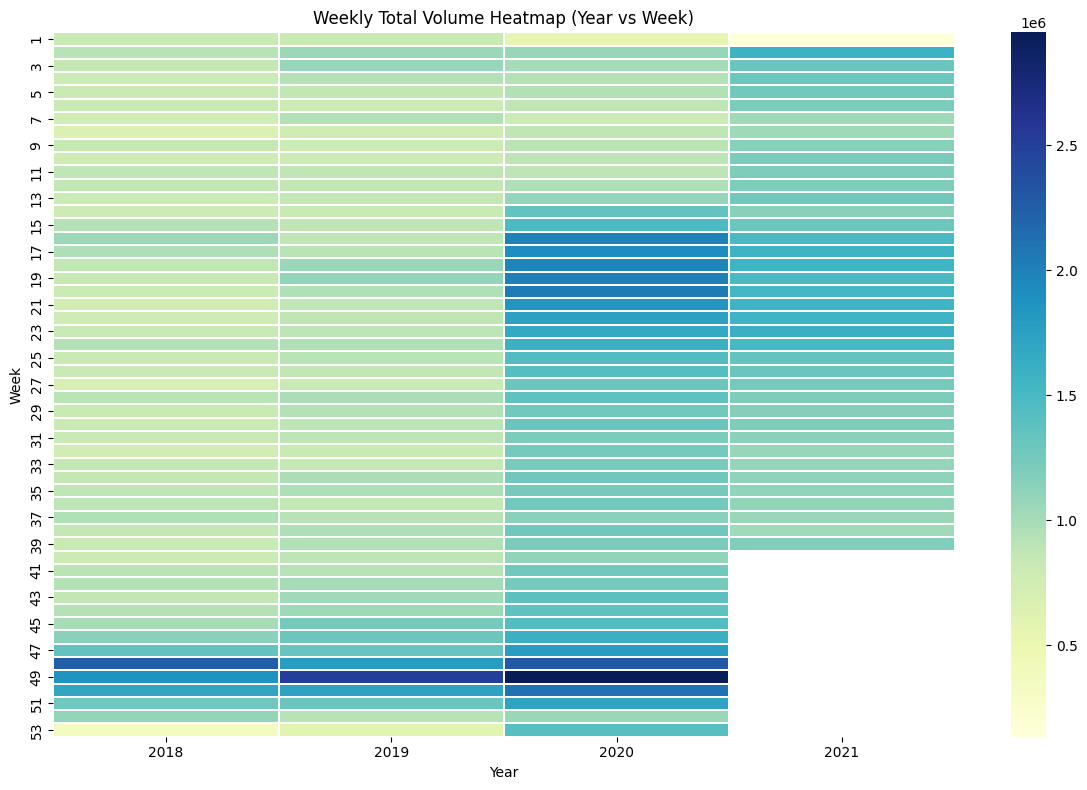

In [13]:
heatmap_data = weekly_agg.pivot(index='THE_WEEK', columns='THE_YEAR', values='Total_Volume')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3)
plt.title('Weekly Total Volume Heatmap (Year vs Week)')
plt.xlabel('Year')
plt.ylabel('Week')
plt.tight_layout()
plt.show()

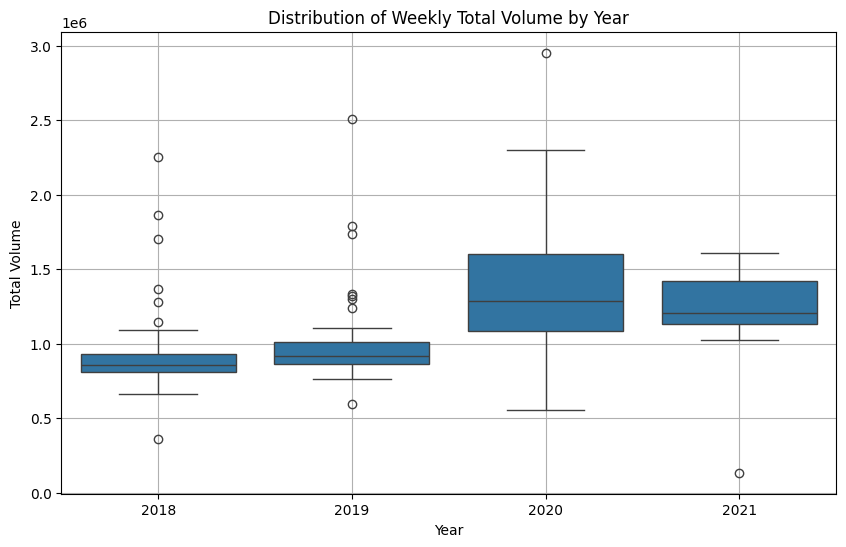

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=weekly_agg, x='THE_YEAR', y='Total_Volume')
plt.title('Distribution of Weekly Total Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.grid(True)
plt.show()

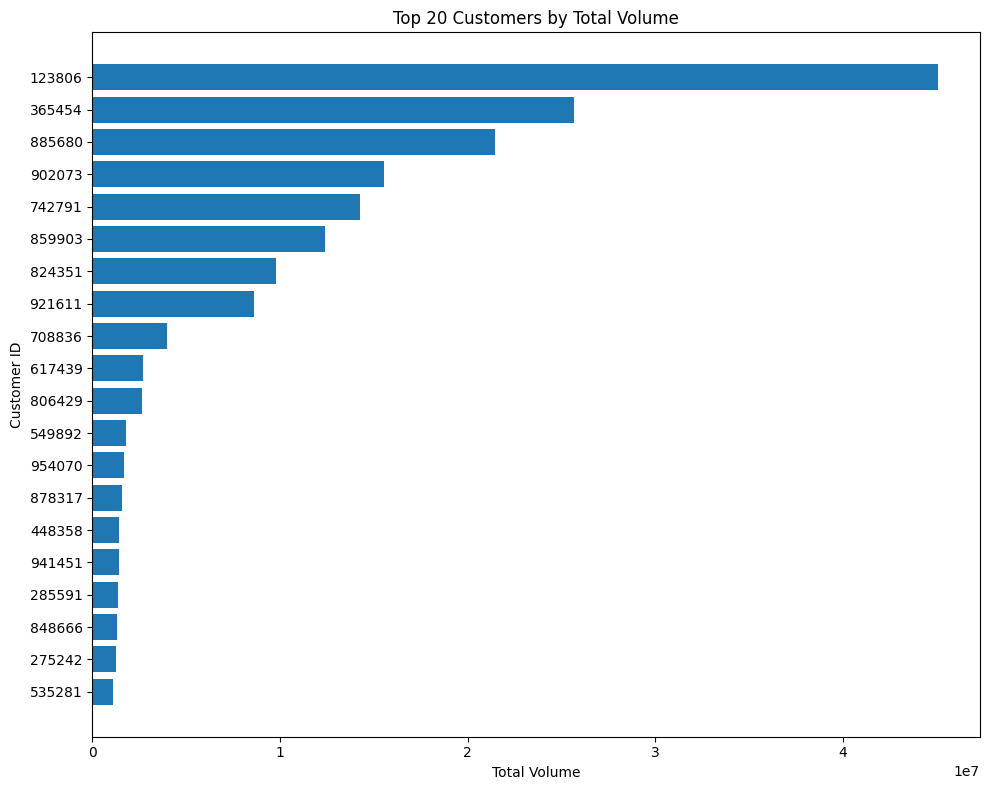

In [15]:
top_cust = customer_summary.sort_values('Total_Volume', ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(top_cust['FakeCustomerID'].astype(str), top_cust['Total_Volume'])
plt.gca().invert_yaxis()
plt.title('Top 20 Customers by Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()